<a href="https://colab.research.google.com/github/gayza-cyber17/studying-Git/blob/main/t_bank_tickets_and_hotels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Т-Банк: отели и авиабилеты

Работу выполнил Бурлаков И.

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import os

!pip install phik
from phik import phik_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 14.9 MB/s eta 0:00:00


In [3]:
from google.colab import files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print("📁 Содержимое корневой папки Диска:")
contents = os.listdir('/content/drive/My Drive/')
for item in contents:
    print(f"  - {item}")

📁 Содержимое корневой папки Диска:
  - Копия Карта навыков аналитика данных.xlsx
  - Копия Проект спринта 4. Шаблон для аналитических комментариев (2).gdoc
  - Копия Проект спринта 4. Шаблон для аналитических комментариев (1).gdoc
  - Копия Копия Проект спринта 4. Шаблон для ан34334алитических комментариев.gdoc
  - Копия Проект спринта 4. Шаблон для аналитических комментариев.gdoc
  - Копия Проект первого модуля. Шаблон для аналитических комментариев.gdoc
  - Копия Песочница первого спринта_Исходные данные.gsheet
  - Colab Notebooks
  - Копия Воркбук студента ИБ.gdoc
  - ДЗ Python (1).ipynb
  - ДЗ_Pandas.ipynb
  - dano_dataset_travel.csv


In [5]:
file_path = '/content/drive/My Drive/dano_dataset_travel.csv'

In [6]:
# создаю ДФ с 1000 строк, чтобы не перегружать комп
df_sample = pd.read_csv(file_path, nrows=1000, sep=';')

In [7]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   order_online_payment_flg     946 non-null    object 
 1   account_rk                   1000 non-null   object 
 2   client_rk                    1000 non-null   object 
 3   order_rk                     1000 non-null   object 
 4   loyalty_program_type_nm      913 non-null    object 
 5   bundle_nm                    715 non-null    object 
 6   order_type_cd                946 non-null    object 
 7   order_status_cd              935 non-null    object 
 8   party_first_order_dt         946 non-null    object 
 9   party_first_order_type_dt    946 non-null    object 
 10  free_cancel_booking_dttm     92 non-null     object 
 11  created_dttm                 946 non-null    object 
 12  cancel_dttm                  0 non-null      float64
 13  book_start_dttm    

In [8]:
df_sample.head()

,order_online_payment_flg,account_rk,client_rk,order_rk,loyalty_program_type_nm,bundle_nm,order_type_cd,order_status_cd,party_first_order_dt,party_first_order_type_dt,...,last_used_product_cd,first_used_product_cd,mobile_phone_operator_nm,marital_status_cd,education_level_cd,birth_place,gender_cd,last_sms_dt,last_email_send_dt,last_session_dttm
0,"1,0",209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...,f4959ffb27271192727050953ecb27a8a8a38af413f3d8...,fe1c6ce13774d102c655df4c01d54c34d495ef3d4c7e63...,Bravo,Pro,AIR,SUC,2019-12-12,2019-12-12,...,MPL,MPL,Тинькофф Мобайл,NaN,NaN,ГОР ЯРОСЛАВЛЬ,M,2024-07-02,NaN,2024-11-06 19:42:52.000000
1,"1,0",2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...,7025587bc277176246bc44dff396036552a41d5a92d6aa...,98cb83b7748cdf77e43a50f56335a376b51fb767893303...,Tinkoff Black Premium,Premium,HOT,SUC,2019-11-21,2023-09-20,...,INV,IBN,TELE2,MAR,GRD,Р П ВЛАДИМИР 30,M,2024-06-26,NaN,2024-11-06 23:36:38.000000
2,"1,0",a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...,0368b36ccd204d631305233a1f952bc5fb0e3fd9f690fa...,1bfb05606a8b16d48121b9f128889cc1d198c87d223a1b...,Tinkoff Black Premium,Premium,AIR,SUC,2023-01-01,2023-01-01,...,MPL,MPL,Скартел,UNM,GRD,ГОРОД АБАКАН РЕСПУБЛИКИ ХАКАСИЯ,M,2024-07-15,NaN,2024-11-06 11:30:31.000000
3,"1,0",9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,1346344779d7bd788d03ec2ad1908daf71c6358aca47f1...,011a98649e7a2be3027ec27c1f0b0cb5dd5d82dda2f482...,NaN,Premium,HOT,NaN,2023-12-18,2023-12-18,...,MPL,MPL,Билайн,NaN,NaN,Г СТОКГОЛЬМ ШВЕЦИЯ,M,2024-06-25,NaN,2024-11-06 15:33:18.000000
4,"1,0",3133e7ae6698dcda9754d6a8b449782320260ff1259547...,1a2a4351a96099f9e49bbe2fc7236d41ac63b444176058...,b5e7909d8d7b902e4cdf268ebcbef6820c10b0ed75614b...,Tinkoff Black Premium,Premium,AIR,SUC,2019-02-18,2019-02-18,...,MPL,MPL,МегаФон,MAR,GRD,ГОР. МОСКВА,M,2024-07-15,2012-04-19,2024-11-06 23:42:28.000000


In [9]:
# создаю список и словарь и заменяю типы данных,
# создаю список со столбцами для будущей раоты с только с ними
# (все включить не могу из-за медленного компуктера.)
dtypes = {
    #'order_online_payment_flg': 'int8',
    'loyalty_program_type_nm': 'category',
    'bundle_nm': 'category',
    'order_type_cd': 'category',
    'order_status_cd': 'category',
    #'order_item_cnt': 'int16',
    #'age': 'int8'

}

parse_dates = ['party_first_order_dt',
    'party_first_order_type_dt',
    'last_session_dttm',
    'created_dttm']

usecols = [
    'order_online_payment_flg', 'account_rk', 'client_rk', 'order_rk',
    'loyalty_program_type_nm', 'order_type_cd', 'bundle_nm', 'order_status_cd',
    'party_first_order_dt', 'party_first_order_type_dt', 'created_dttm',
    'hotel_country', 'hotel_city', 'avia_dep_city', 'avia_arr_city',
    'promo_code_discount_amt', 'monthly_income_amt','nominal_price_rub_amt',
    'order_item_cnt', 'age', 'parent_meeting_region_nm',
    'first_used_product_cd', 'mobile_phone_operator_nm', 'last_session_dttm',
]

In [10]:
# создаю ДФ с выбранными столбцами
data = pd.read_csv(
    file_path,
    sep=';',
    dtype=dtypes,
    usecols=usecols,
    dayfirst=True,
    low_memory=False,
    parse_dates = parse_dates
)

In [11]:
data.head()

,order_online_payment_flg,account_rk,client_rk,order_rk,loyalty_program_type_nm,bundle_nm,order_type_cd,order_status_cd,party_first_order_dt,party_first_order_type_dt,...,avia_arr_city,promo_code_discount_amt,nominal_price_rub_amt,order_item_cnt,monthly_income_amt,age,parent_meeting_region_nm,first_used_product_cd,mobile_phone_operator_nm,last_session_dttm
0,"1,0",209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...,f4959ffb27271192727050953ecb27a8a8a38af413f3d8...,fe1c6ce13774d102c655df4c01d54c34d495ef3d4c7e63...,Bravo,Pro,AIR,SUC,2019-12-12,2019-12-12,...,Москва,"0,0","15018,0","1,0","113900,0","31,0",МО Северо-Восток,MPL,Тинькофф Мобайл,2024-11-06 19:42:52.000000
1,"1,0",2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...,7025587bc277176246bc44dff396036552a41d5a92d6aa...,98cb83b7748cdf77e43a50f56335a376b51fb767893303...,Tinkoff Black Premium,Premium,HOT,SUC,2019-11-21,2023-09-20,...,NaN,NaN,"27751,0",NaN,"53600,0","39,0",МСК,IBN,TELE2,2024-11-06 23:36:38.000000
2,"1,0",a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...,0368b36ccd204d631305233a1f952bc5fb0e3fd9f690fa...,1bfb05606a8b16d48121b9f128889cc1d198c87d223a1b...,Tinkoff Black Premium,Premium,AIR,SUC,2023-01-01,2023-01-01,...,Благовещенск,"0,0","7590,0","1,0",NaN,"28,0",Благовещенск,MPL,Скартел,2024-11-06 11:30:31.000000
3,"1,0",9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,1346344779d7bd788d03ec2ad1908daf71c6358aca47f1...,011a98649e7a2be3027ec27c1f0b0cb5dd5d82dda2f482...,NaN,Premium,HOT,NaN,2023-12-18,2023-12-18,...,NaN,NaN,"7705,0",NaN,"234500,0","61,0",МСК,MPL,Билайн,2024-11-06 15:33:18.000000
4,"1,0",3133e7ae6698dcda9754d6a8b449782320260ff1259547...,1a2a4351a96099f9e49bbe2fc7236d41ac63b444176058...,b5e7909d8d7b902e4cdf268ebcbef6820c10b0ed75614b...,Tinkoff Black Premium,Premium,AIR,SUC,2019-02-18,2019-02-18,...,Москва,"0,0","8352,0","1,0","703500,0","36,0",Москва Центр Хамовники,MPL,МегаФон,2024-11-06 23:42:28.000000


In [12]:
# заменяю в данных типа 'object' запятую на точку
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '.')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835938 entries, 0 to 835937
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   order_online_payment_flg   786885 non-null  object  
 1   account_rk                 835938 non-null  object  
 2   client_rk                  835938 non-null  object  
 3   order_rk                   835938 non-null  object  
 4   loyalty_program_type_nm    754957 non-null  category
 5   bundle_nm                  588049 non-null  category
 6   order_type_cd              786885 non-null  category
 7   order_status_cd            779514 non-null  category
 8   party_first_order_dt       786885 non-null  object  
 9   party_first_order_type_dt  786767 non-null  object  
 10  created_dttm               786885 non-null  object  
 11  hotel_country              162248 non-null  object  
 12  hotel_city                 162248 non-null  object  
 13  avia_dep_city 

In [14]:
# меняю типы данных в столбцах
numeric_columns = [
    'order_online_payment_flg',
    'promo_code_discount_amt',
    'order_item_cnt',
    #'monthly_income_amt',
    'nominal_price_rub_amt',
    'age'
]

for col in numeric_columns:
    if col in data.columns:
        if col in ['order_online_payment_flg', 'order_item_cnt', 'age']:
            data[col] = pd.to_numeric(data[col], errors='coerce').astype('Int16')
        else:
            data[col] = pd.to_numeric(data[col], errors='coerce').astype('float32')

In [15]:
date_columns = [
    'party_first_order_dt',
    'party_first_order_type_dt',
    'created_dttm',
    'last_session_dttm'
]

for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], dayfirst=True, errors='coerce')

In [16]:
# смотрю на процент пустых значений
data.isna().sum() / data.shape[0] * 100

,0
order_online_payment_flg,5.868019
account_rk,0.000000
client_rk,0.000000
order_rk,0.000000
loyalty_program_type_nm,9.687441
bundle_nm,29.653993
order_type_cd,5.868019
order_status_cd,6.749783
party_first_order_dt,61.676584
party_first_order_type_dt,62.513488


In [17]:
# смотрю на кол-во пропусков
data.duplicated(subset=['account_rk', 'client_rk', 'order_rk']).sum()

np.int64(0)

Вижу очень много пропущенных значений в столбцах. Избавляться от такого кол-ва строк я не буду. Вижу, что после преобразвония данные пропали , пока не понимаю почему так произошло.


In [18]:
data['monthly_income_amt'] = data['monthly_income_amt'].astype('float')

array([[<Axes: title={'center': 'order_online_payment_flg'}>,
        <Axes: title={'center': 'party_first_order_dt'}>,
        <Axes: title={'center': 'party_first_order_type_dt'}>],
       [<Axes: title={'center': 'created_dttm'}>,
        <Axes: title={'center': 'promo_code_discount_amt'}>,
        <Axes: title={'center': 'nominal_price_rub_amt'}>],
       [<Axes: title={'center': 'order_item_cnt'}>,
        <Axes: title={'center': 'monthly_income_amt'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'last_session_dttm'}>, <Axes: >,
        <Axes: >]], dtype=object)

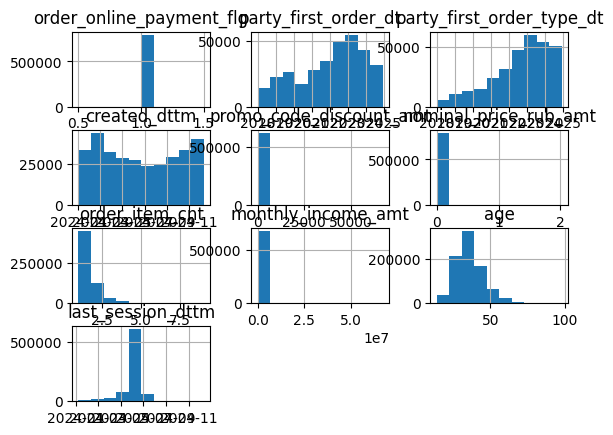

In [19]:
data.hist()

In [20]:
data.head()

,order_online_payment_flg,account_rk,client_rk,order_rk,loyalty_program_type_nm,bundle_nm,order_type_cd,order_status_cd,party_first_order_dt,party_first_order_type_dt,...,avia_arr_city,promo_code_discount_amt,nominal_price_rub_amt,order_item_cnt,monthly_income_amt,age,parent_meeting_region_nm,first_used_product_cd,mobile_phone_operator_nm,last_session_dttm
0,1,209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...,f4959ffb27271192727050953ecb27a8a8a38af413f3d8...,fe1c6ce13774d102c655df4c01d54c34d495ef3d4c7e63...,Bravo,Pro,AIR,SUC,2019-12-12,2019-12-12,...,Москва,0.0,15018.0,1,113900.0,31,МО Северо-Восток,MPL,Тинькофф Мобайл,2024-06-11 19:42:52
1,1,2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...,7025587bc277176246bc44dff396036552a41d5a92d6aa...,98cb83b7748cdf77e43a50f56335a376b51fb767893303...,Tinkoff Black Premium,Premium,HOT,SUC,NaT,NaT,...,NaN,NaN,27751.0,<NA>,53600.0,39,МСК,IBN,TELE2,2024-06-11 23:36:38
2,1,a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...,0368b36ccd204d631305233a1f952bc5fb0e3fd9f690fa...,1bfb05606a8b16d48121b9f128889cc1d198c87d223a1b...,Tinkoff Black Premium,Premium,AIR,SUC,2023-01-01,2023-01-01,...,Благовещенск,0.0,7590.0,1,NaN,28,Благовещенск,MPL,Скартел,2024-06-11 11:30:31
3,1,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,1346344779d7bd788d03ec2ad1908daf71c6358aca47f1...,011a98649e7a2be3027ec27c1f0b0cb5dd5d82dda2f482...,NaN,Premium,HOT,NaN,NaT,NaT,...,NaN,NaN,7705.0,<NA>,234500.0,61,МСК,MPL,Билайн,2024-06-11 15:33:18
4,1,3133e7ae6698dcda9754d6a8b449782320260ff1259547...,1a2a4351a96099f9e49bbe2fc7236d41ac63b444176058...,b5e7909d8d7b902e4cdf268ebcbef6820c10b0ed75614b...,Tinkoff Black Premium,Premium,AIR,SUC,NaT,NaT,...,Москва,0.0,8352.0,1,703500.0,36,Москва Центр Хамовники,MPL,МегаФон,2024-06-11 23:42:28


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835938 entries, 0 to 835937
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   order_online_payment_flg   786885 non-null  Int16         
 1   account_rk                 835938 non-null  object        
 2   client_rk                  835938 non-null  object        
 3   order_rk                   835938 non-null  object        
 4   loyalty_program_type_nm    754957 non-null  category      
 5   bundle_nm                  588049 non-null  category      
 6   order_type_cd              786885 non-null  category      
 7   order_status_cd            779514 non-null  category      
 8   party_first_order_dt       320360 non-null  datetime64[ns]
 9   party_first_order_type_dt  313364 non-null  datetime64[ns]
 10  created_dttm               314056 non-null  datetime64[ns]
 11  hotel_country              162248 non-null  object  

In [22]:
data['category_salary'] = pd.qcut(data['monthly_income_amt'], q=6)

<Axes: ylabel='Frequency'>

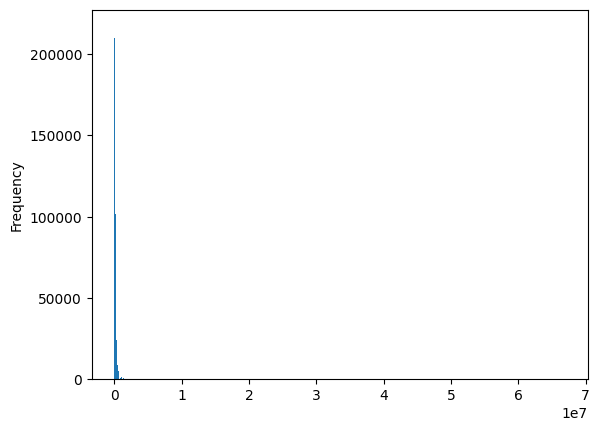

In [45]:
data['monthly_income_amt'].plot(kind='hist', bins=1000)

In [55]:
data['monthly_income_amt'].shape[0]

835938

In [56]:
data['monthly_income_amt'].isna().sum()

np.int64(162860)

In [74]:
# удаляю пропуски и разбиваю на группы по мес. доходу
incomes = data['monthly_income_amt'].dropna()


income_categories = pd.cut(incomes,
                          bins=[0, 10000, 30000, 60000, 100000, 200000, 300000, float('inf')],
                          labels=['до 10К', 'c 10K до 30К', 'c 30К до 60К', 'c 60K до 100К', 'c 100К до 200К','с 200К до 300К', 'более 300К'],
                          right=False)


category_distribution = income_categories.value_counts().sort_index().reset_index()
category_percentage = income_categories.value_counts(normalize=True).sort_index() * 100

In [75]:
# доля дохода по категориям
category_percentage

,proportion
monthly_income_amt,
до 10К,1.887151
c 10K до 30К,6.124996
c 30К до 60К,20.112676
c 60K до 100К,22.077679
c 100К до 200К,28.241006
с 200К до 300К,10.751800
более 300К,10.804691


In [76]:
category_distribution['count'].sum()

np.int64(673078)

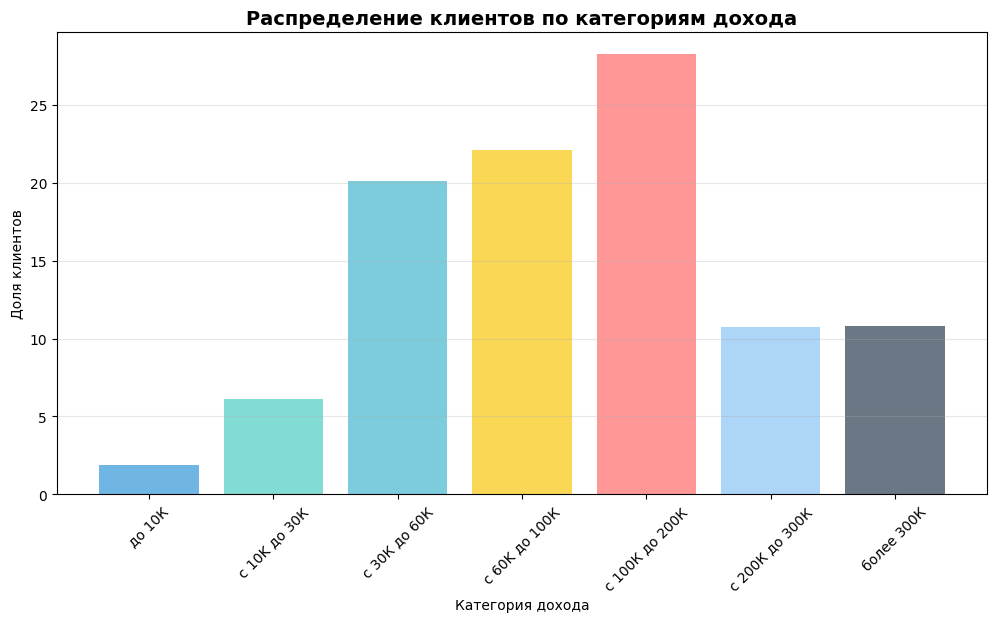

In [77]:
# строю столбчатый график долей доода по категории мес.дохода
plt.figure(figsize=(12, 6))
bars = plt.bar(category_percentage.index, category_percentage.values,
               color=['#3498db', '#4ecdc4', '#45b7d1', '#f9c80e', '#ff6b6b',
                      '#89c4f4', '#2c3e50'],
               alpha=0.7)

plt.title('Распределение клиентов по категориям дохода', fontsize=14, fontweight='bold')
plt.xlabel('Категория дохода')
plt.ylabel('Доля клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

Видим, что наиболее большая категория по мес. доходу - это категория людей с доход от 100К до 199К включительно. Эта доля состовляет более 28 %. Самая маленькая категория по мес.доходу - это группа до 10К - доля от всех составляет менее 2%.

In [73]:
data.age.isna().sum()

np.int64(1)

In [78]:
# удаляю пропуски и разбиваю на группы по категории возраста
ages = data['age'].dropna()


ages_categories = pd.cut(ages,
                          bins=[0, 15, 18, 21, 25, 30, 40, float('inf')],
                          labels=['до 14 лет', 'с 14 до 18', 'c 18 до 21', 'c 21 до 25', 'c 25 до 30','с 30 до 40', 'старше 40 лет'],
                          right=False)


category_ages = ages_categories.value_counts().sort_index().reset_index()
category_percentage_ages = ages_categories.value_counts(normalize=True).sort_index() * 100

In [79]:
category_percentage_ages

,proportion
age,
до 14 лет,0.013996
с 14 до 18,0.357084
c 18 до 21,1.693788
c 21 до 25,6.805896
c 25 до 30,16.983098
с 30 до 40,42.657999
старше 40 лет,31.488138


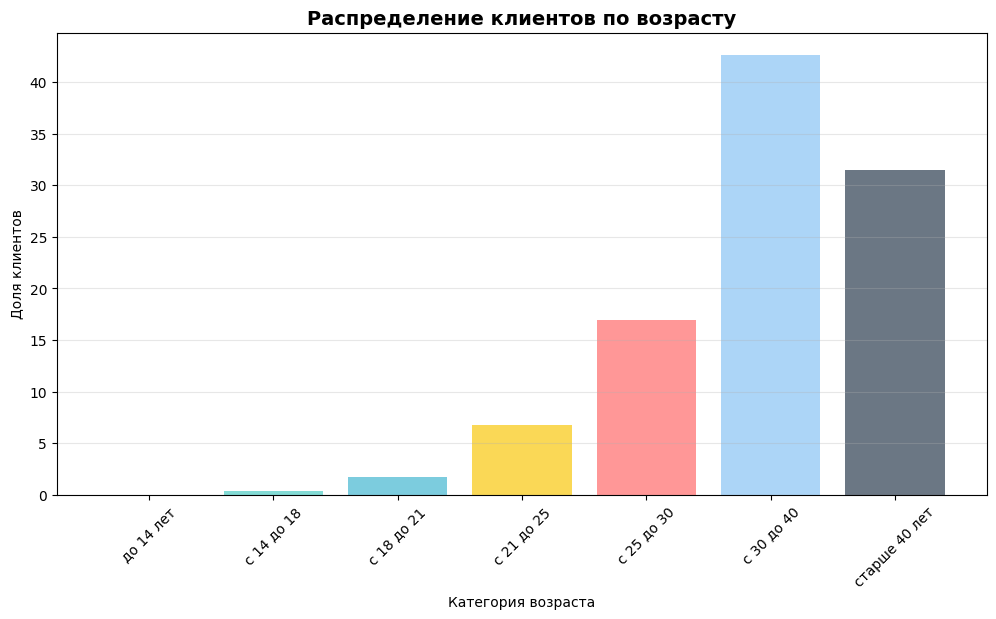

In [80]:
plt.figure(figsize=(12, 6))
bars = plt.bar(category_percentage_ages.index, category_percentage_ages.values,
               color=['#3498db', '#4ecdc4', '#45b7d1', '#f9c80e', '#ff6b6b',
                      '#89c4f4', '#2c3e50'],
               alpha=0.7)

plt.title('Распределение клиентов по возрасту', fontsize=14, fontweight='bold')
plt.xlabel('Категория возраста')
plt.ylabel('Доля клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

На графике выше можем наблюдать интересную картину. У нас есть клиенты до 14 лет, что является очень странным. Ведь не могут люди не достигшие 14 лет самостоятельно заселяться в гостиницу без сопровождения. Но могут ли они бронировать места и дает ли им это приложения - вопрос.

['AIR', 'HOT', NaN]
Categories (2, object): ['AIR', 'HOT']

А еще я понял, что правильнее было бы отдельно рассматривать билеты и заселение в гостиницу. и уже работать отдельно с ними.

In [83]:
hotel_data = data[data['order_type_cd'] == 'HOT']
air_data = data[data['order_type_cd'] == 'AIR']

,proportion
age,
до 14 лет,0.010493
с 14 до 18,0.077529
c 18 до 21,0.671532
c 21 до 25,3.984308
c 25 до 30,13.216709
с 30 до 40,46.932054
старше 40 лет,35.107375


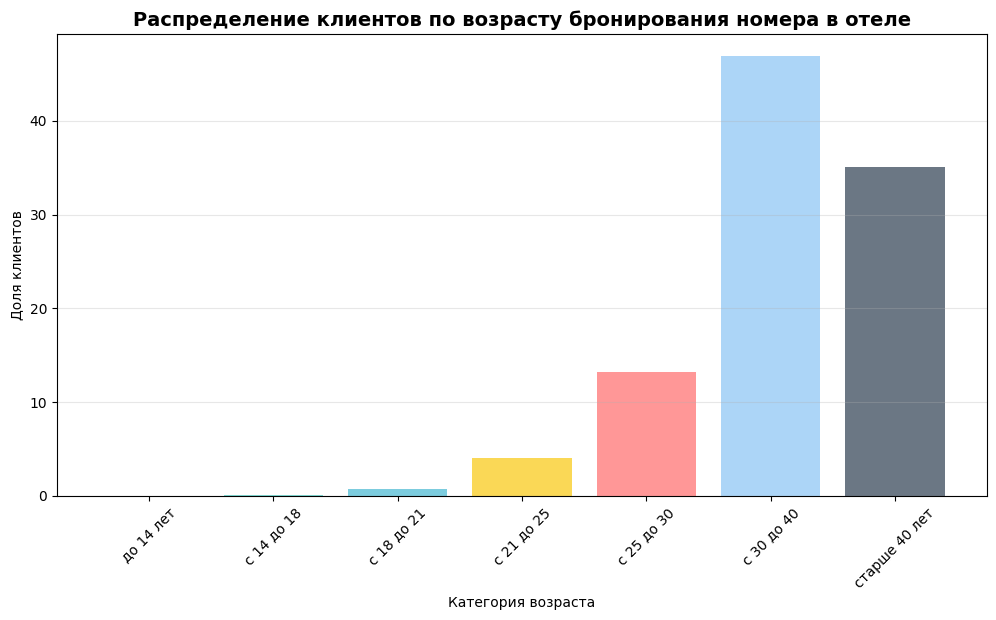

In [86]:
ages = hotel_data['age'].dropna()


ages_categories = pd.cut(ages,
                          bins=[0, 15, 18, 21, 25, 30, 40, float('inf')],
                          labels=['до 14 лет', 'с 14 до 18', 'c 18 до 21', 'c 21 до 25', 'c 25 до 30','с 30 до 40', 'старше 40 лет'],
                          right=False)


category_ages = ages_categories.value_counts().sort_index().reset_index()
category_percentage_ages = ages_categories.value_counts(normalize=True).sort_index() * 100
# строю график распределения коиентов по возрасту , но только для бронирования номера в отеле
plt.figure(figsize=(12, 6))
bars = plt.bar(category_percentage_ages.index, category_percentage_ages.values,
               color=['#3498db', '#4ecdc4', '#45b7d1', '#f9c80e', '#ff6b6b',
                      '#89c4f4', '#2c3e50'],
               alpha=0.7)

plt.title('Распределение клиентов по возрасту бронирования номера в отеле', fontsize=14, fontweight='bold')
plt.xlabel('Категория возраста')
plt.ylabel('Доля клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
category_percentage_ages

,proportion
age,
до 14 лет,0.004713
с 14 до 18,0.277084
c 18 до 21,1.539644
c 21 до 25,7.141778
c 25 до 30,18.259588
с 30 до 40,42.372879
старше 40 лет,30.404315


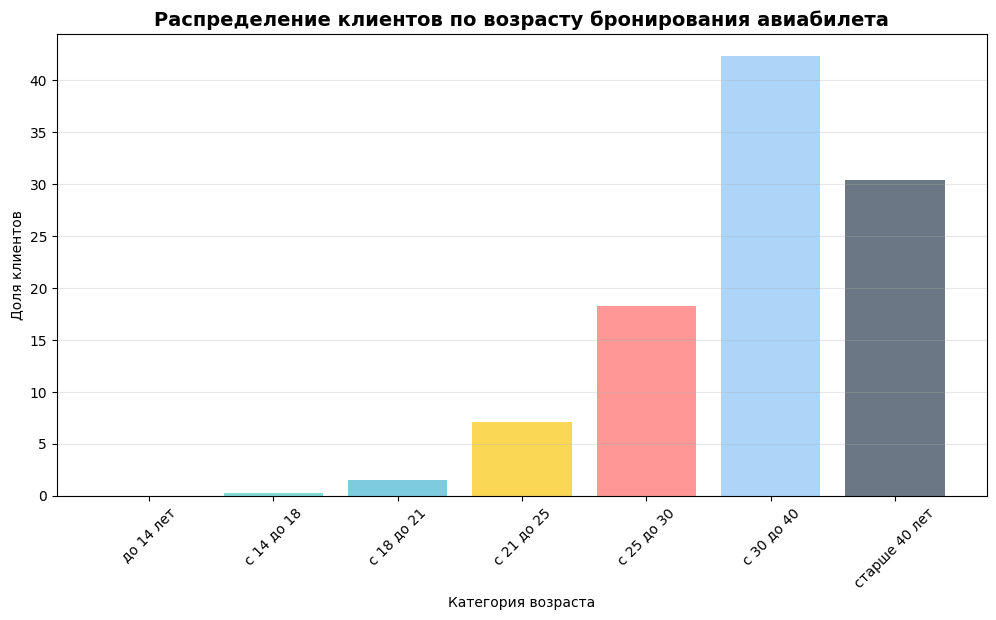

In [87]:
ages = air_data['age'].dropna()


ages_categories = pd.cut(ages,
                          bins=[0, 15, 18, 21, 25, 30, 40, float('inf')],
                          labels=['до 14 лет', 'с 14 до 18', 'c 18 до 21', 'c 21 до 25', 'c 25 до 30','с 30 до 40', 'старше 40 лет'],
                          right=False)


category_ages = ages_categories.value_counts().sort_index().reset_index()
category_percentage_ages = ages_categories.value_counts(normalize=True).sort_index() * 100
# строю график распределения коиентов по возрасту , но только для авиабилетов
plt.figure(figsize=(12, 6))
bars = plt.bar(category_percentage_ages.index, category_percentage_ages.values,
               color=['#3498db', '#4ecdc4', '#45b7d1', '#f9c80e', '#ff6b6b',
                      '#89c4f4', '#2c3e50'],
               alpha=0.7)

plt.title('Распределение клиентов по возрасту бронирования авиабилета', fontsize=14, fontweight='bold')
plt.xlabel('Категория возраста')
plt.ylabel('Доля клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
category_percentage_ages

Можем увидеть, что в двух ДФ есть доли бронирования у категории до 13 лет включительно(хоть и доля небольшая, но все-таки это нарушает законы нашей страны), что является странным. Это может быть ошибка системы или юзеры не правильно указали свой возраст. Мне интересно как тут все работает. Получается, что приложение допускает такое бронирование. Или юзеры могли бронировать номер в отеле или авиабилет для кого-то из своих более старших знакомых?

Также стоит отметить, что наиболее частая группа , которая пользуется сервисом бронирования это катеогрия людей от 30 до 40 лет. В обоих сервисах по бронированию (номера в отелях и авиабилеты) доля этой категории составляет более 42%.

Стоит отметить, что в целом наиболее платежные граждане - это возраст людей от 30 и выше, те которые уже стабильно работают, неплохо зарабатывают и чаще начинают путешествовать. Одна из задач сервиса удержать высокую долю в категориях от 30 до 40 и от 40 выше.

Но интересно было бы увеличить кол-во юзеров категорий с 21 до 25 и с 25 до 30. Возможно, стоит предложить этим катеогриям скидку, акцию, или отправить им пуши. Это может увеличить кол-во пользователей этих категорий и в будущем повлиять на ретеншн.

In [100]:
# доли продуктов, которые продставляет Т-банк
data.loyalty_program_type_nm.value_counts(normalize=True) * 100

,proportion
loyalty_program_type_nm,
Tinkoff Black,38.291055
Tinkoff Black Premium,25.035201
All Airlines,18.956576
Bravo,5.487465
All Airlines Premium Кредитный,3.792799
All Airlines Premium,2.156017
AllAirLinesDebit,1.963556
Tinkoff Black Private,0.926410
Tinkoff Platinum,0.815146


Видим, что большинство продуктов не пользуются спросом, скорее всего, они не приност прибыли. Возможно, какие-то стоит убрать. Выделим `топ-3` продукта и долю этого продукта от всех продуктов, которые предоставляются:

1.Tinkoff Black	38.29

2.Tinkoff Black Premium	25.0

3.All Airlines	18.96

In [103]:
# Доли подписок
data.bundle_nm.value_counts(normalize=True) * 100

,proportion
bundle_nm,
Premium,49.668990
Pro,48.682508
Private,1.422330
Team Premium,0.140124
Team Select,0.046085
Team Pro,0.025508
Team Private,0.006292
Tinkoff Premium,0.004251
Tinkoff Pro,0.003911


Из таблицы выше можно увидеть, что подписка `Premium` и подписка `Pro` являются "монополистами" среди всех возможных подписок. Их общая доля состовляет более 98%.

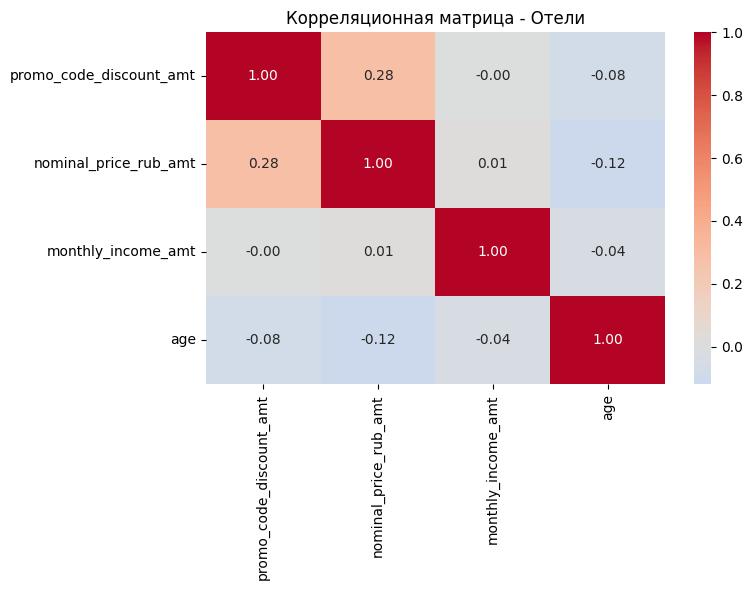

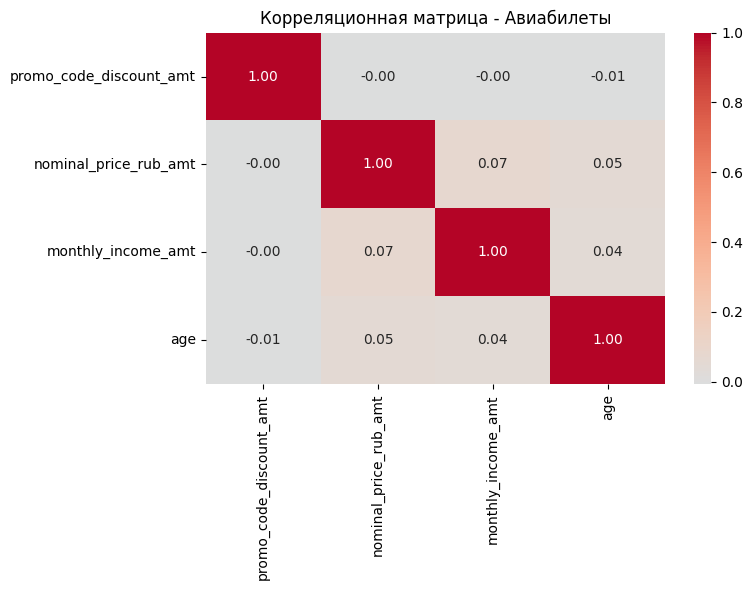

In [109]:
numeric_cols = ['promo_code_discount_amt', 'nominal_price_rub_amt', 'monthly_income_amt', 'age']

# Анализ для отелей
hotel_numeric = hotel_data[numeric_cols].dropna()
if len(hotel_numeric) > 0:
    hotel_corr = hotel_numeric.corr()


    plt.figure(figsize=(8, 6))
    sns.heatmap(hotel_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Корреляционная матрица - Отели')
    plt.tight_layout()
    plt.show()

# Анализ для авиабилетов
air_numeric = air_data[numeric_cols].dropna()
if len(air_numeric) > 0:
    air_corr = air_numeric.corr()


    plt.figure(figsize=(8, 6))
    sns.heatmap(air_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Корреляционная матрица - Авиабилеты')
    plt.tight_layout()
    plt.show()

Корреляцию построил ради инетерса, по выбранным столбцам она ничего интересного не показала.

<Axes: >

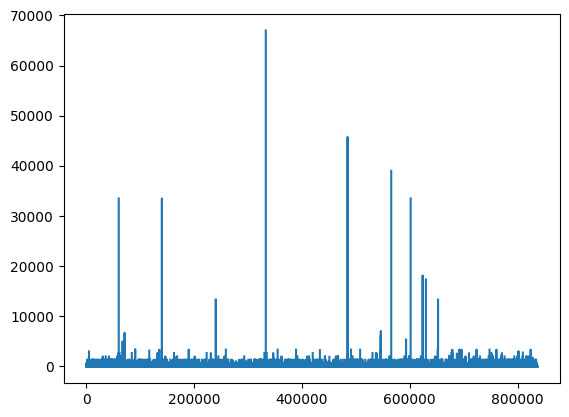

In [113]:
data.head()

,order_online_payment_flg,account_rk,client_rk,order_rk,loyalty_program_type_nm,bundle_nm,order_type_cd,order_status_cd,party_first_order_dt,party_first_order_type_dt,...,promo_code_discount_amt,nominal_price_rub_amt,order_item_cnt,monthly_income_amt,age,parent_meeting_region_nm,first_used_product_cd,mobile_phone_operator_nm,last_session_dttm,category_salary
0,1,209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...,f4959ffb27271192727050953ecb27a8a8a38af413f3d8...,fe1c6ce13774d102c655df4c01d54c34d495ef3d4c7e63...,Bravo,Pro,AIR,SUC,2019-12-12,2019-12-12,...,0.0,15018.0,1,113900.0,31,МО Северо-Восток,MPL,Тинькофф Мобайл,2024-06-11 19:42:52,"(97150.0, 134000.0]"
1,1,2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...,7025587bc277176246bc44dff396036552a41d5a92d6aa...,98cb83b7748cdf77e43a50f56335a376b51fb767893303...,Tinkoff Black Premium,Premium,HOT,SUC,NaT,NaT,...,NaN,27751.0,<NA>,53600.0,39,МСК,IBN,TELE2,2024-06-11 23:36:38,"(40200.0, 67000.0]"
2,1,a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...,0368b36ccd204d631305233a1f952bc5fb0e3fd9f690fa...,1bfb05606a8b16d48121b9f128889cc1d198c87d223a1b...,Tinkoff Black Premium,Premium,AIR,SUC,2023-01-01,2023-01-01,...,0.0,7590.0,1,NaN,28,Благовещенск,MPL,Скартел,2024-06-11 11:30:31,NaN
3,1,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,1346344779d7bd788d03ec2ad1908daf71c6358aca47f1...,011a98649e7a2be3027ec27c1f0b0cb5dd5d82dda2f482...,NaN,Premium,HOT,NaN,NaT,NaT,...,NaN,7705.0,<NA>,234500.0,61,МСК,MPL,Билайн,2024-06-11 15:33:18,"(207700.0, 67000000.0]"
4,1,3133e7ae6698dcda9754d6a8b449782320260ff1259547...,1a2a4351a96099f9e49bbe2fc7236d41ac63b444176058...,b5e7909d8d7b902e4cdf268ebcbef6820c10b0ed75614b...,Tinkoff Black Premium,Premium,AIR,SUC,NaT,NaT,...,0.0,8352.0,1,703500.0,36,Москва Центр Хамовники,MPL,МегаФон,2024-06-11 23:42:28,"(207700.0, 67000000.0]"


In [115]:
print(data.last_session_dttm.min())
print(data.last_session_dttm.max())

2024-01-08 04:38:46
2024-12-10 23:08:12


In [116]:
# создаю столбец только с месяцем последней сессией
data['monthly'] = data['last_session_dttm'].dt.month

In [117]:
data['monthly'].value_counts()

,count
monthly,
6.0,606622
5.0,82178
7.0,62863
4.0,27162
3.0,14039
2.0,9238
1.0,6792
12.0,491
10.0,470


Возможно, дело тут в сезонности. Все-таки летом пик активности у туристов.

In [129]:
data.groupby('monthly')['promo_code_discount_amt'].median()

,promo_code_discount_amt
monthly,
1.0,0.0
2.0,0.0
3.0,0.0
4.0,0.0
5.0,0.0
6.0,0.0
7.0,0.0
8.0,0.0
9.0,0.0


In [132]:
data.groupby('monthly')['promo_code_discount_amt'].mean()

,promo_code_discount_amt
monthly,
1.0,2.110799
2.0,3.560165
3.0,4.106987
4.0,11.533017
5.0,4.852140
6.0,5.243560
7.0,7.543170
8.0,2.212264
9.0,5.537190


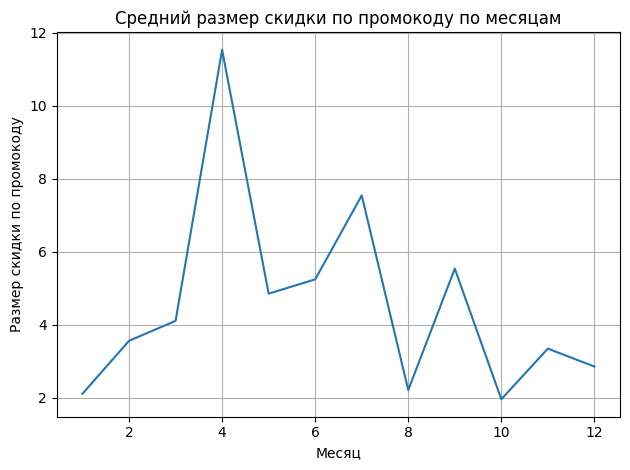

In [136]:
ax = data.groupby('monthly')['promo_code_discount_amt'].mean().plot(kind='line')

plt.title('Средний размер скидки по промокоду по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Размер скидки по промокоду')
plt.grid()

plt.tight_layout()
plt.show()

Видим, что в апреле у кого-то была очень большая скидка. С чем это может быть связано я не знаю. Но медиана равна 0. Значит очень длинный хвост, очень большие экстремальные значения.

Интересно узнать сколько кол-ва бронирований было по отношению к каждому месяцу.

In [138]:
data.groupby('monthly')['order_rk'].count()

,order_rk
monthly,
1.0,6792
2.0,9238
3.0,14039
4.0,27162
5.0,82178
6.0,606622
7.0,62863
8.0,319
9.0,369


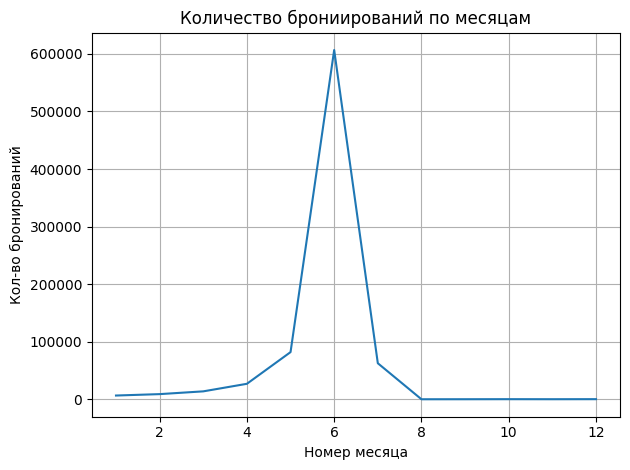

In [145]:
#
ex = data.groupby('monthly')['order_rk'].count().plot(kind='line')

plt.title('Количество брониирований по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Кол-во бронирований')
plt.grid()

plt.tight_layout()
plt.show()

In [142]:
hotel_data['monthly'] = hotel_data['last_session_dttm'].dt.month
air_data['monthly'] = air_data['last_session_dttm'].dt.month

/tmp/ipython-input-4261545152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_data['monthly'] = hotel_data['last_session_dttm'].dt.month
/tmp/ipython-input-4261545152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_data['monthly'] = air_data['last_session_dttm'].dt.month


Исходя из графика выше, видим, что июнь является лидером среди месяцев по бронированию, что вызвано сезонностью. Построим такие же графики, только для разных видов бронирований.

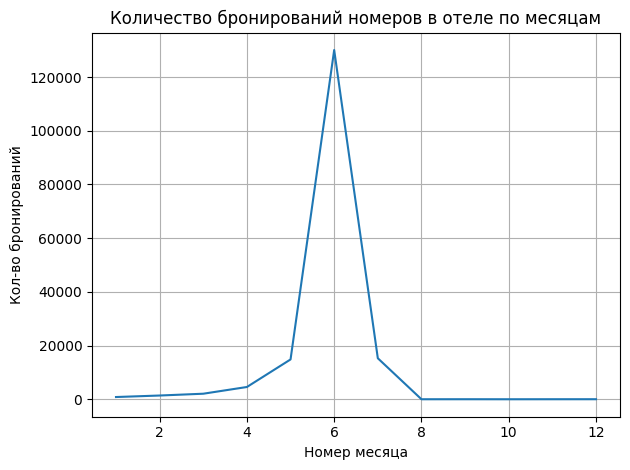

In [143]:
ex = hotel_data.groupby('monthly')['order_rk'].count().plot(kind='line')

plt.title('Количество бронирований номеров в отеле по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Кол-во бронирований')
plt.grid()

plt.tight_layout()
plt.show()

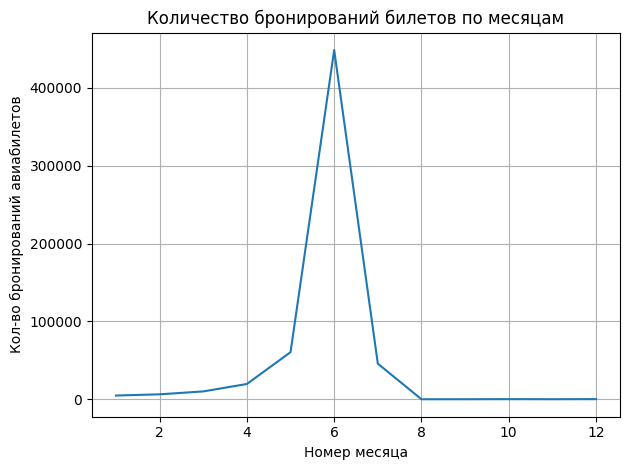

In [144]:
ux = air_data.groupby('monthly')['order_rk'].count().plot(kind='line')

plt.title('Количество бронирований билетов по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Кол-во бронирований авиабилетов')
plt.grid()

plt.tight_layout()
plt.show()

Все как и на основном графике. Июнь - топ месяц для броинрований авиабилетов и гостиниц.

### Вывод.

Здесь можно многое попробовать и построить, но проект получился на скорую руку. Приступил к проекту только сутки назад, думал, что он не окажется таким маштабным. Но это мои проблемы!

Я использовал ИИ , так как долго возился с подключениме файла к гугл колаб. Неожидал, что будет такой большой по размерам файл и из-за этого я не стал загружать все поля датасета из-за компьютера, а взял лишь несколько на свое усмотрение, что не совсем правильно. Но это круто! Классный опыт для меня.


Исходя из данных и графиков, которые я построил можно сделать вывод, что резкий спрос на броинрвоание обоих сервисов начинается с апреля и заканчивается в конце июля, а июнь - абсолютный лидер по броинрованию. Наиболее платжеспособными людьми являются люди в возрасте от 30 и выше.

Можно сформировать несколько гипотез исходя из данных.

1. Можно попробовать увеличть кол-во пользователей от 20 до 30 лет, благодаря специальным акциям, скидкам, рекламным компаниям или отправлением пушей людям этого возраста.

2. Можно попробовать убрать несколько нерентабельных продуктов, которыми почти никто не пользуется. И это снизит нагрузку на людей и ресурсы.

3. Можно увеличить размер скидки по промокоду или увеличить кэшбэк на бронирование в августе, сентябре и ноябре, что может способствовать увеличению кол-ва бронирований в эти месяцы.

